In [1]:
import os

try:
    has_changed_dir
except:
    has_changed_dir = False

try:
    import google.colab
    IN_COLAB = True
    print("Running as a Colab notebook")
except:
    IN_COLAB = False

if IN_COLAB:
    %pip install datasets
    %pip install translate-toolkit
    %pip install fasttext

    !git clone https://github.com/MartinKirkegaardDK/KDS_MI.git

    if not has_changed_dir:
        os.chdir('KDS_MI')
        has_changed_dir = True
else:
    if not has_changed_dir:
        os.chdir('.')
        has_changed_dir = True

In [4]:
%load_ext autoreload
%autoreload 2

In [3]:
from drivers import (
    preprocessing,probe_confidence_intervals,
    steering, create_steering_vectors,
    steering_loss,
    distance_plots,
    create_average_activation_vectors,
    visualising_steering_vectors,
    visualising_activations,
    visualize_probe_results,
    create_bible_data,
    process_bible_data,
    visualize_bible_study
)

from pathlib import Path


c:\Users\tjupp\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
all_languages = ["nb","is","da","en","sv"]
model_name="downloaded_models/gpt_gptsw3_en_da_is_356m_gbs1024"

not_target_languages = []
target = "da"

for split in model_name.split("_"):
    if (split in all_languages) and (split !=target):
        not_target_languages.append(split)

if "download" in model_name:
    model_name_temp = model_name.split("/")[-1]
else:
    model_name_temp = model_name

## Data preprocessing

Preprocesses the multilingual data, by removing short sentences

In [3]:
preprocessing.run()

## Analysis of residual stream activations

### PCA of activations

found device: cuda:0
Load data


  5%|▍         | 6/130 [00:15<05:27,  2.64s/it]


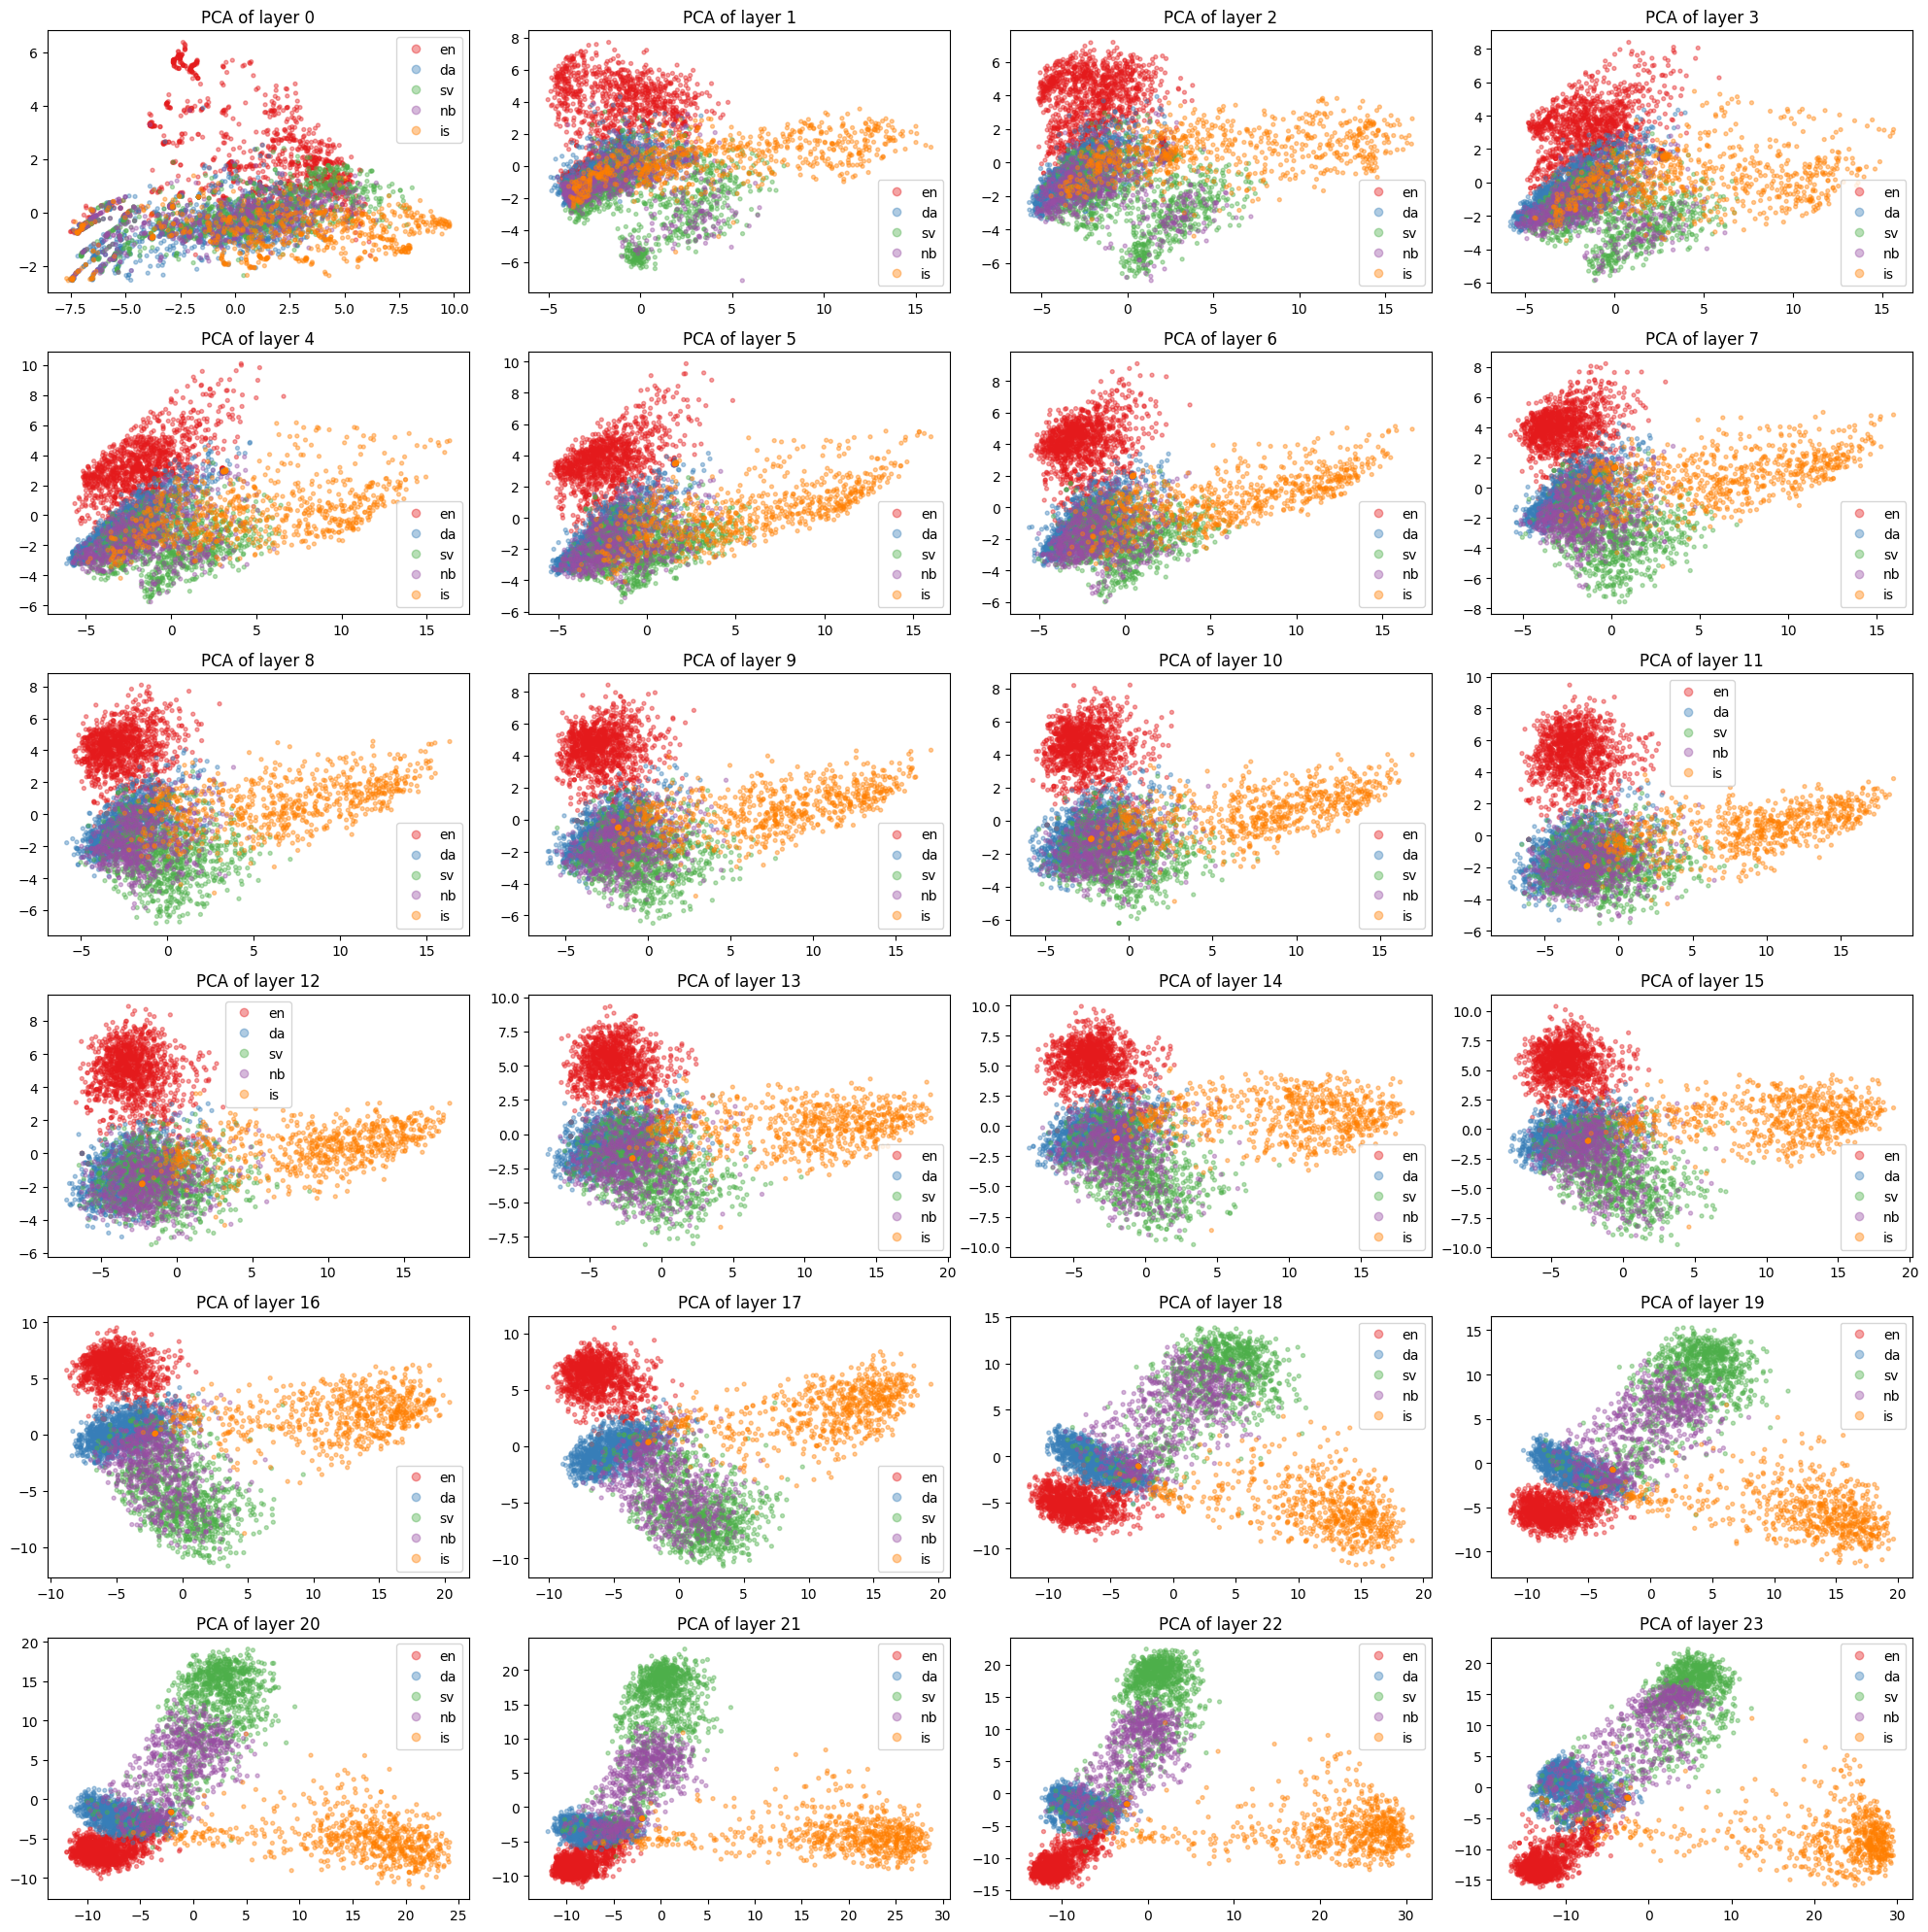

In [ ]:

visualising_activations.run(model_name=model_name)

### Classification probes

In [3]:
#This takes a long time to run
probe_confidence_intervals.run(
    model_name=model_name,
    reg_lambdas=[0.1, 0.5, 1, 2, 5, 10]
)

Load model
found device: cuda:0
Load data
Extract activations


  6%|▌         | 6/104 [00:13<03:47,  2.32s/it]


Bootstrap
Bootstrap
Bootstrap
Bootstrap
Bootstrap
Bootstrap


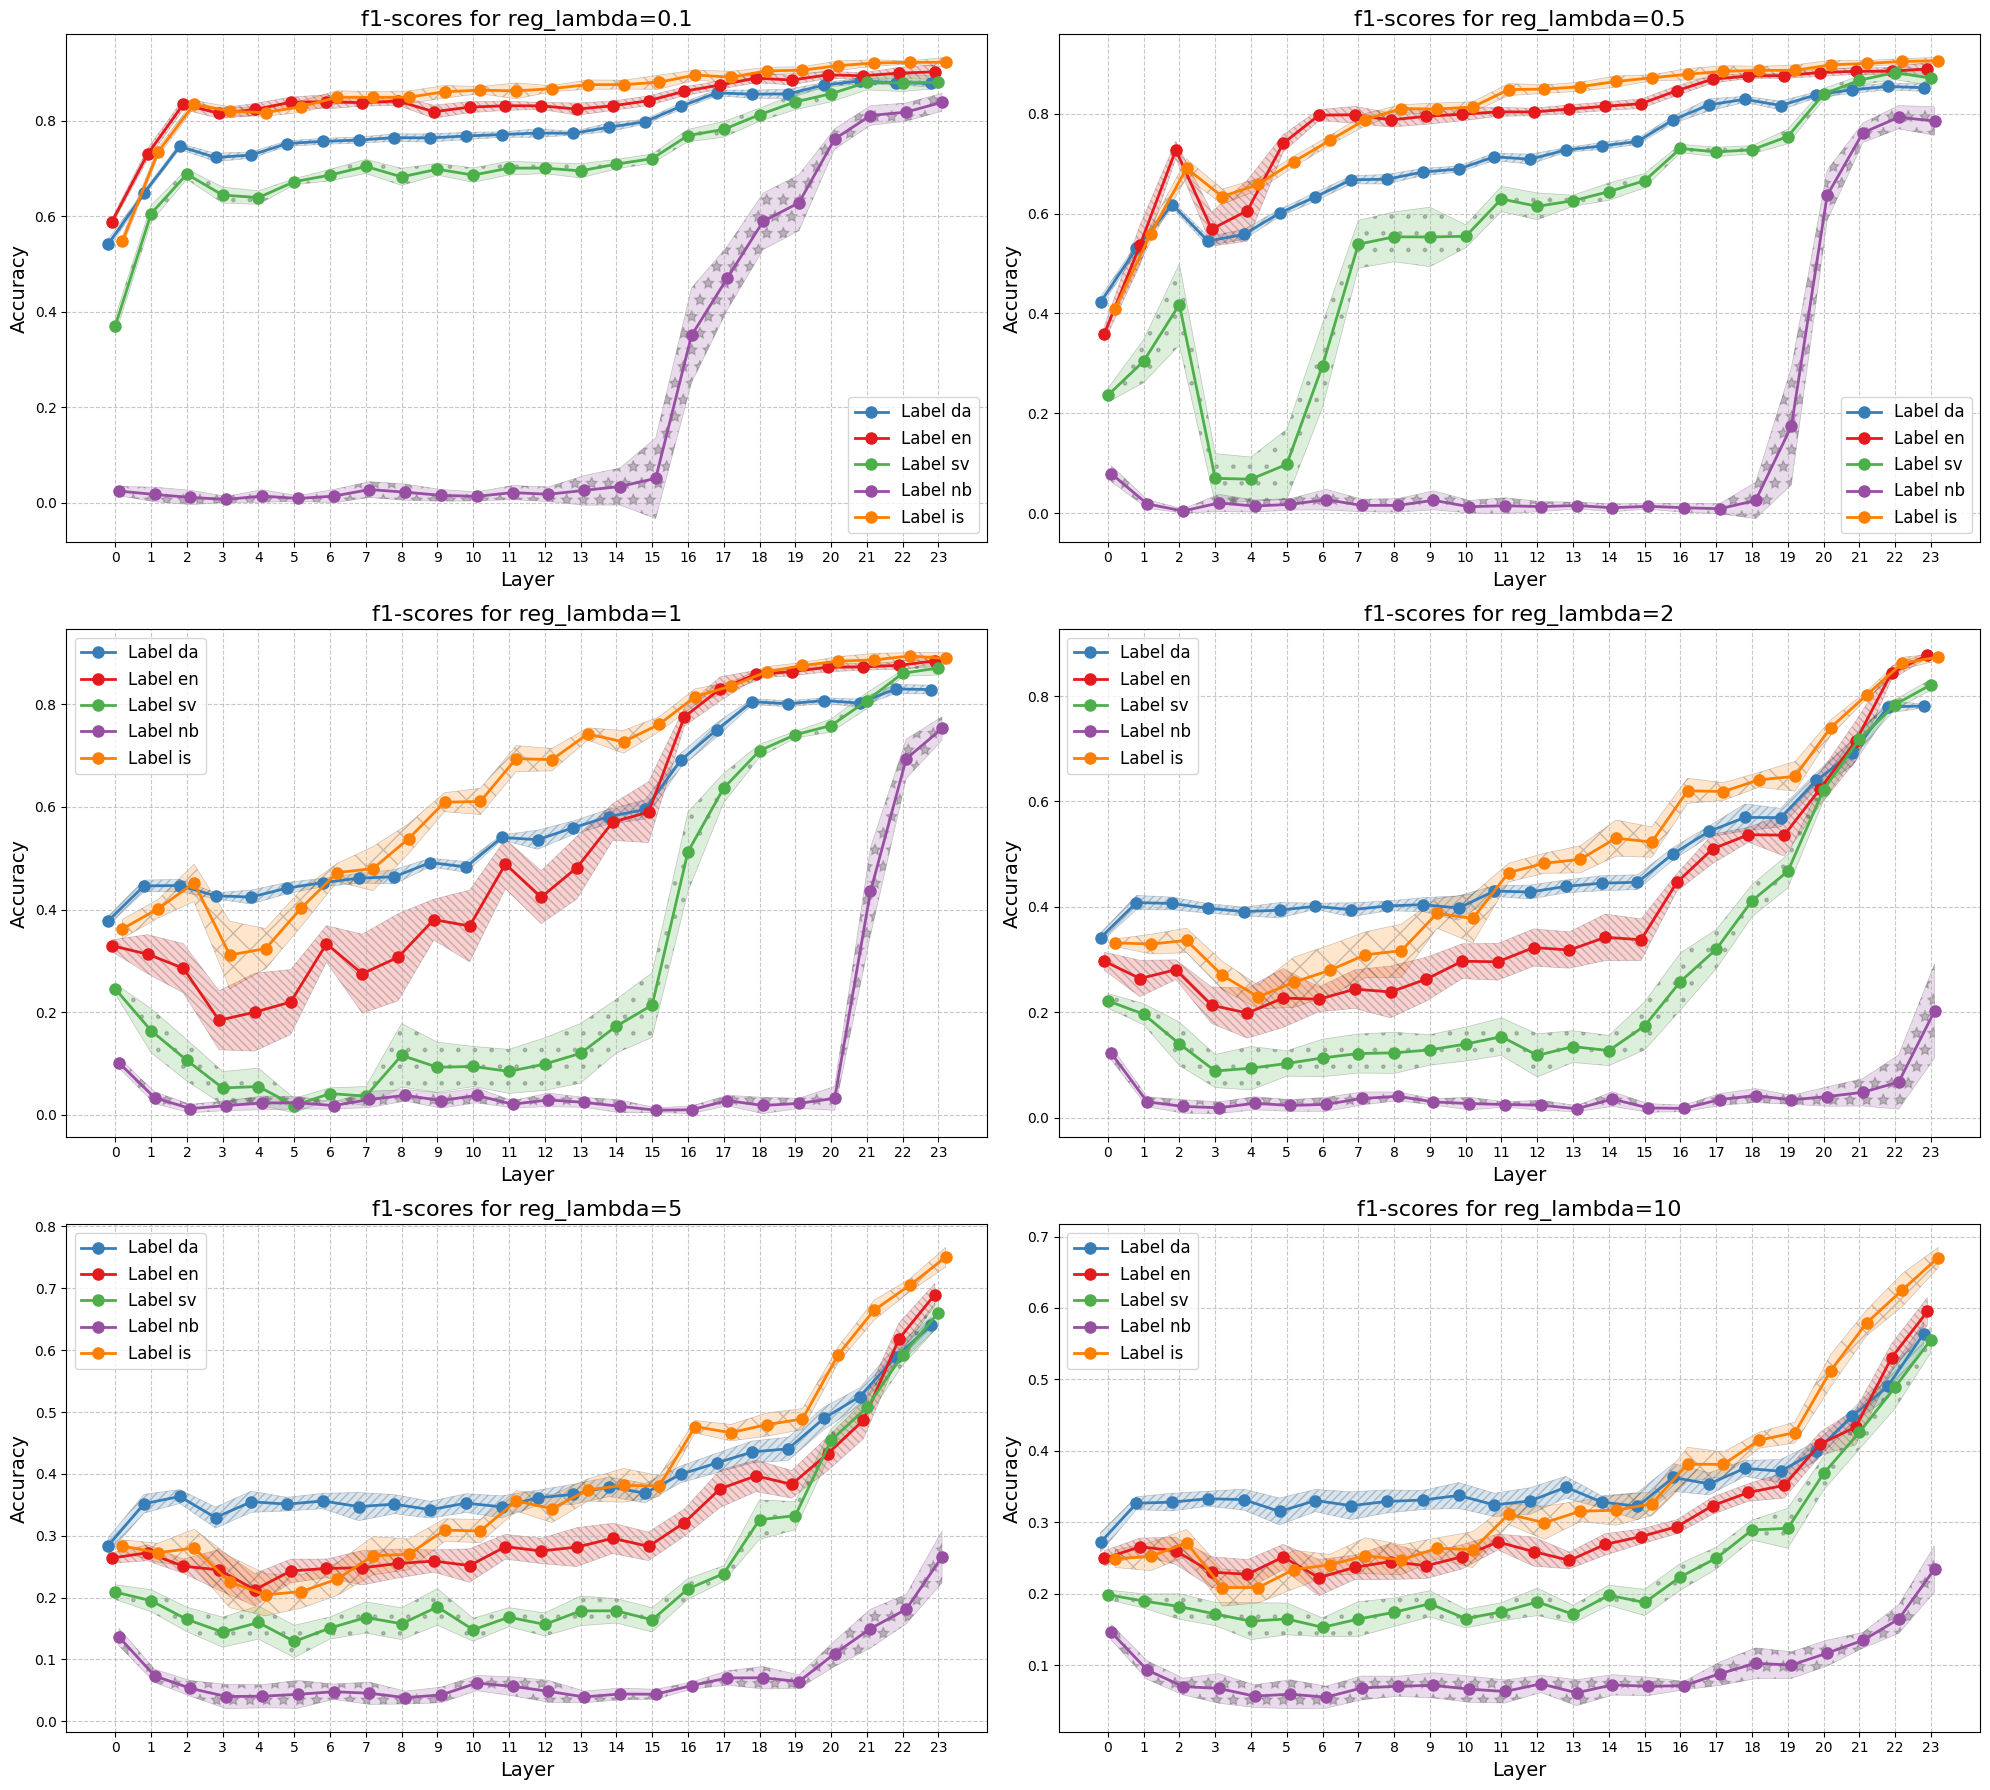

In [ ]:


visualize_probe_results.run(
    probe_result_path_by_reg_lambda={
        0.1: f'results/data/probe_confidence_intervals/{model_name_temp.replace("/","-")}_reg_lambda_0.1.json',
        0.5: f'results/data/probe_confidence_intervals/{model_name_temp.replace("/","-")}_reg_lambda_0.5.json',
        1: f'results/data/probe_confidence_intervals/{model_name_temp.replace("/","-")}_reg_lambda_1.json',
        2: f'results/data/probe_confidence_intervals/{model_name_temp.replace("/","-")}_reg_lambda_2.json',
        5: f'results/data/probe_confidence_intervals/{model_name_temp.replace("/","-")}_reg_lambda_5.json',
        10: f'results/data/probe_confidence_intervals/{model_name_temp.replace("/","-")}_reg_lambda_10.json',
    },
    model_name= model_name_temp
    
)

## Create average activation vectors
these are the "base" steering vectors e.i. the average activations for different layers and languages.
This function generates them and the next block then splits them up for the analysis section

['da', 'en']

In [ ]:
#create_average_activation_vectors.run(["nb","is","da","en","sv"],model_name= model_name,run_name = model_name_temp)
create_average_activation_vectors.run([target] + not_target_languages,model_name= model_name,run_name = model_name_temp)

found device: cuda:0
Load data


 20%|██        | 6/30 [00:17<01:10,  2.94s/it]


## Create steering vector
these are the steering vectors towards a specific language. This is different that

In [ ]:
#AI-Sweden-Models/gpt-sw3-356m
create_steering_vectors.run(
    model_name=model_name_temp,
    target_language=target,
    complement_languages=not_target_languages
)

c:\Users\tjupp\Documents\GitHub\KDS_MI\utils\distance_plots.py:15: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  steering_vector = torch.load(str(path + file))


## plots the distance plots

c:\Users\tjupp\Documents\GitHub\KDS_MI\utils\distance_plots.py:15: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  steering_vector = torch.load(str(path + file))


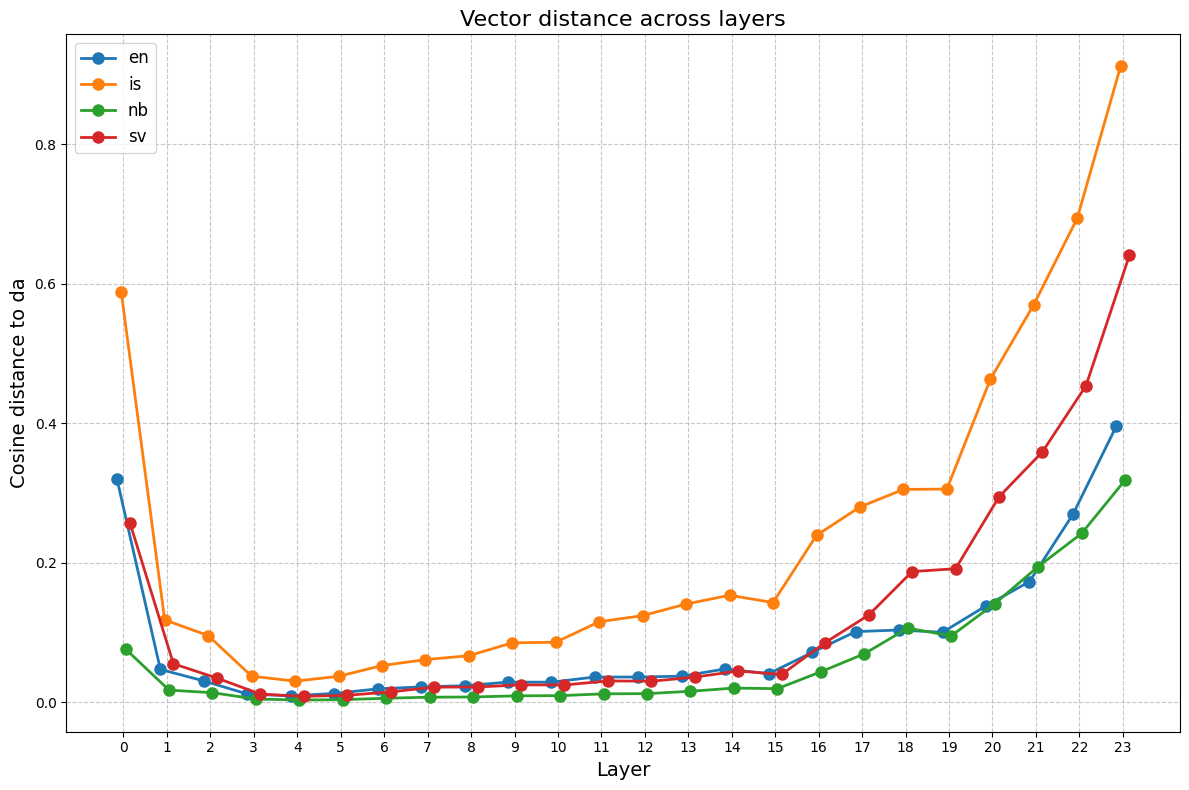

In [ ]:
#AI-Sweden-Models/gpt-sw3-356m
distance_plots.run(model_name_temp, target,f"average_activation_vectors/{model_name_temp}/","cosine")

## Test steering vectors

In [4]:
layer = 5

steering_vector_path = f"steering_vectors/{model_name_temp}/combined_steering_vector_layer_{layer}_tensor.pt"

steering.run(
    steering_vector_path=steering_vector_path,
    steering_lambda=5,
    affected_language="en",
    layer=layer,
    model_name=model_name,
    data_folder='data/preprocessed/train'
)

c:\Users\tjupp\Documents\GitHub\KDS_MI\drivers\steering.py:35: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  steering_vector = torch.load(str(steering_vector_path))
The atte

found device: cuda:0


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


In a pooled analysis of antibiotic stewardship, and that the efficacy of the antibiotic is not impaired by the use of the antibiotic, it is not recommended that the antibiotic is used in the treatment of the infection.  This entry was posted in For women on Tuesday, October 24, 2019 10:53:54 PM by Tygotilar .  Laserbehandling af hårfjerning - Laserbehandling af hårfjer 


a) Following local evidence-based antibiotic guidelines, I did not see any significant change in my current use of amoxicillin and itching symptoms.  Doxycycline is a common bactericidal antibiotic used for the treatment of infections caused by bacteria that cause bladder infections, the researchers were very glad to receive the help of their colleagues to discover and develop a new antibiotic. In a study of the incidence of bacterial infections in humans, and the treatment of patients with infection with 


Professionals in emergency departments should only start antibiotic therapy when there is a clear suspicion of 

## Measure steering vector loss impact

In [4]:
#This also takes some time to run
steering_vector_folder = f'steering_vectors/{model_name_temp}'

steering_loss.run(
    steering_vector_folder=steering_vector_folder,
    model_name=model_name
)

found device: cuda:0


c:\Users\tjupp\Documents\GitHub\KDS_MI\drivers\steering_loss.py:34: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  layer: torch.load(steering_vector_folder / f'combined_steer

## Plot steering vector PCAs

steering_vector_folder = Path('steering_vectors/')

visualising_steering_vectors.run(
    steering_vector_paths_by_language={
        'en': lambda layer: steering_vector_folder / f'EN/combined_steering_vector_layer_{layer}_tensor.pt',
        'da': lambda layer: steering_vector_folder / f'DA/combined_steering_vector_layer_{layer}_tensor.pt',
        'sv': lambda layer: steering_vector_folder / f'SV/combined_steering_vector_layer_{layer}_tensor.pt',
        'nb': lambda layer: steering_vector_folder / f'NB/combined_steering_vector_layer_{layer}_tensor.pt',
        'is': lambda layer: steering_vector_folder / f'IS/combined_steering_vector_layer_{layer}_tensor.pt'
    },
    hidden_layers=24
)

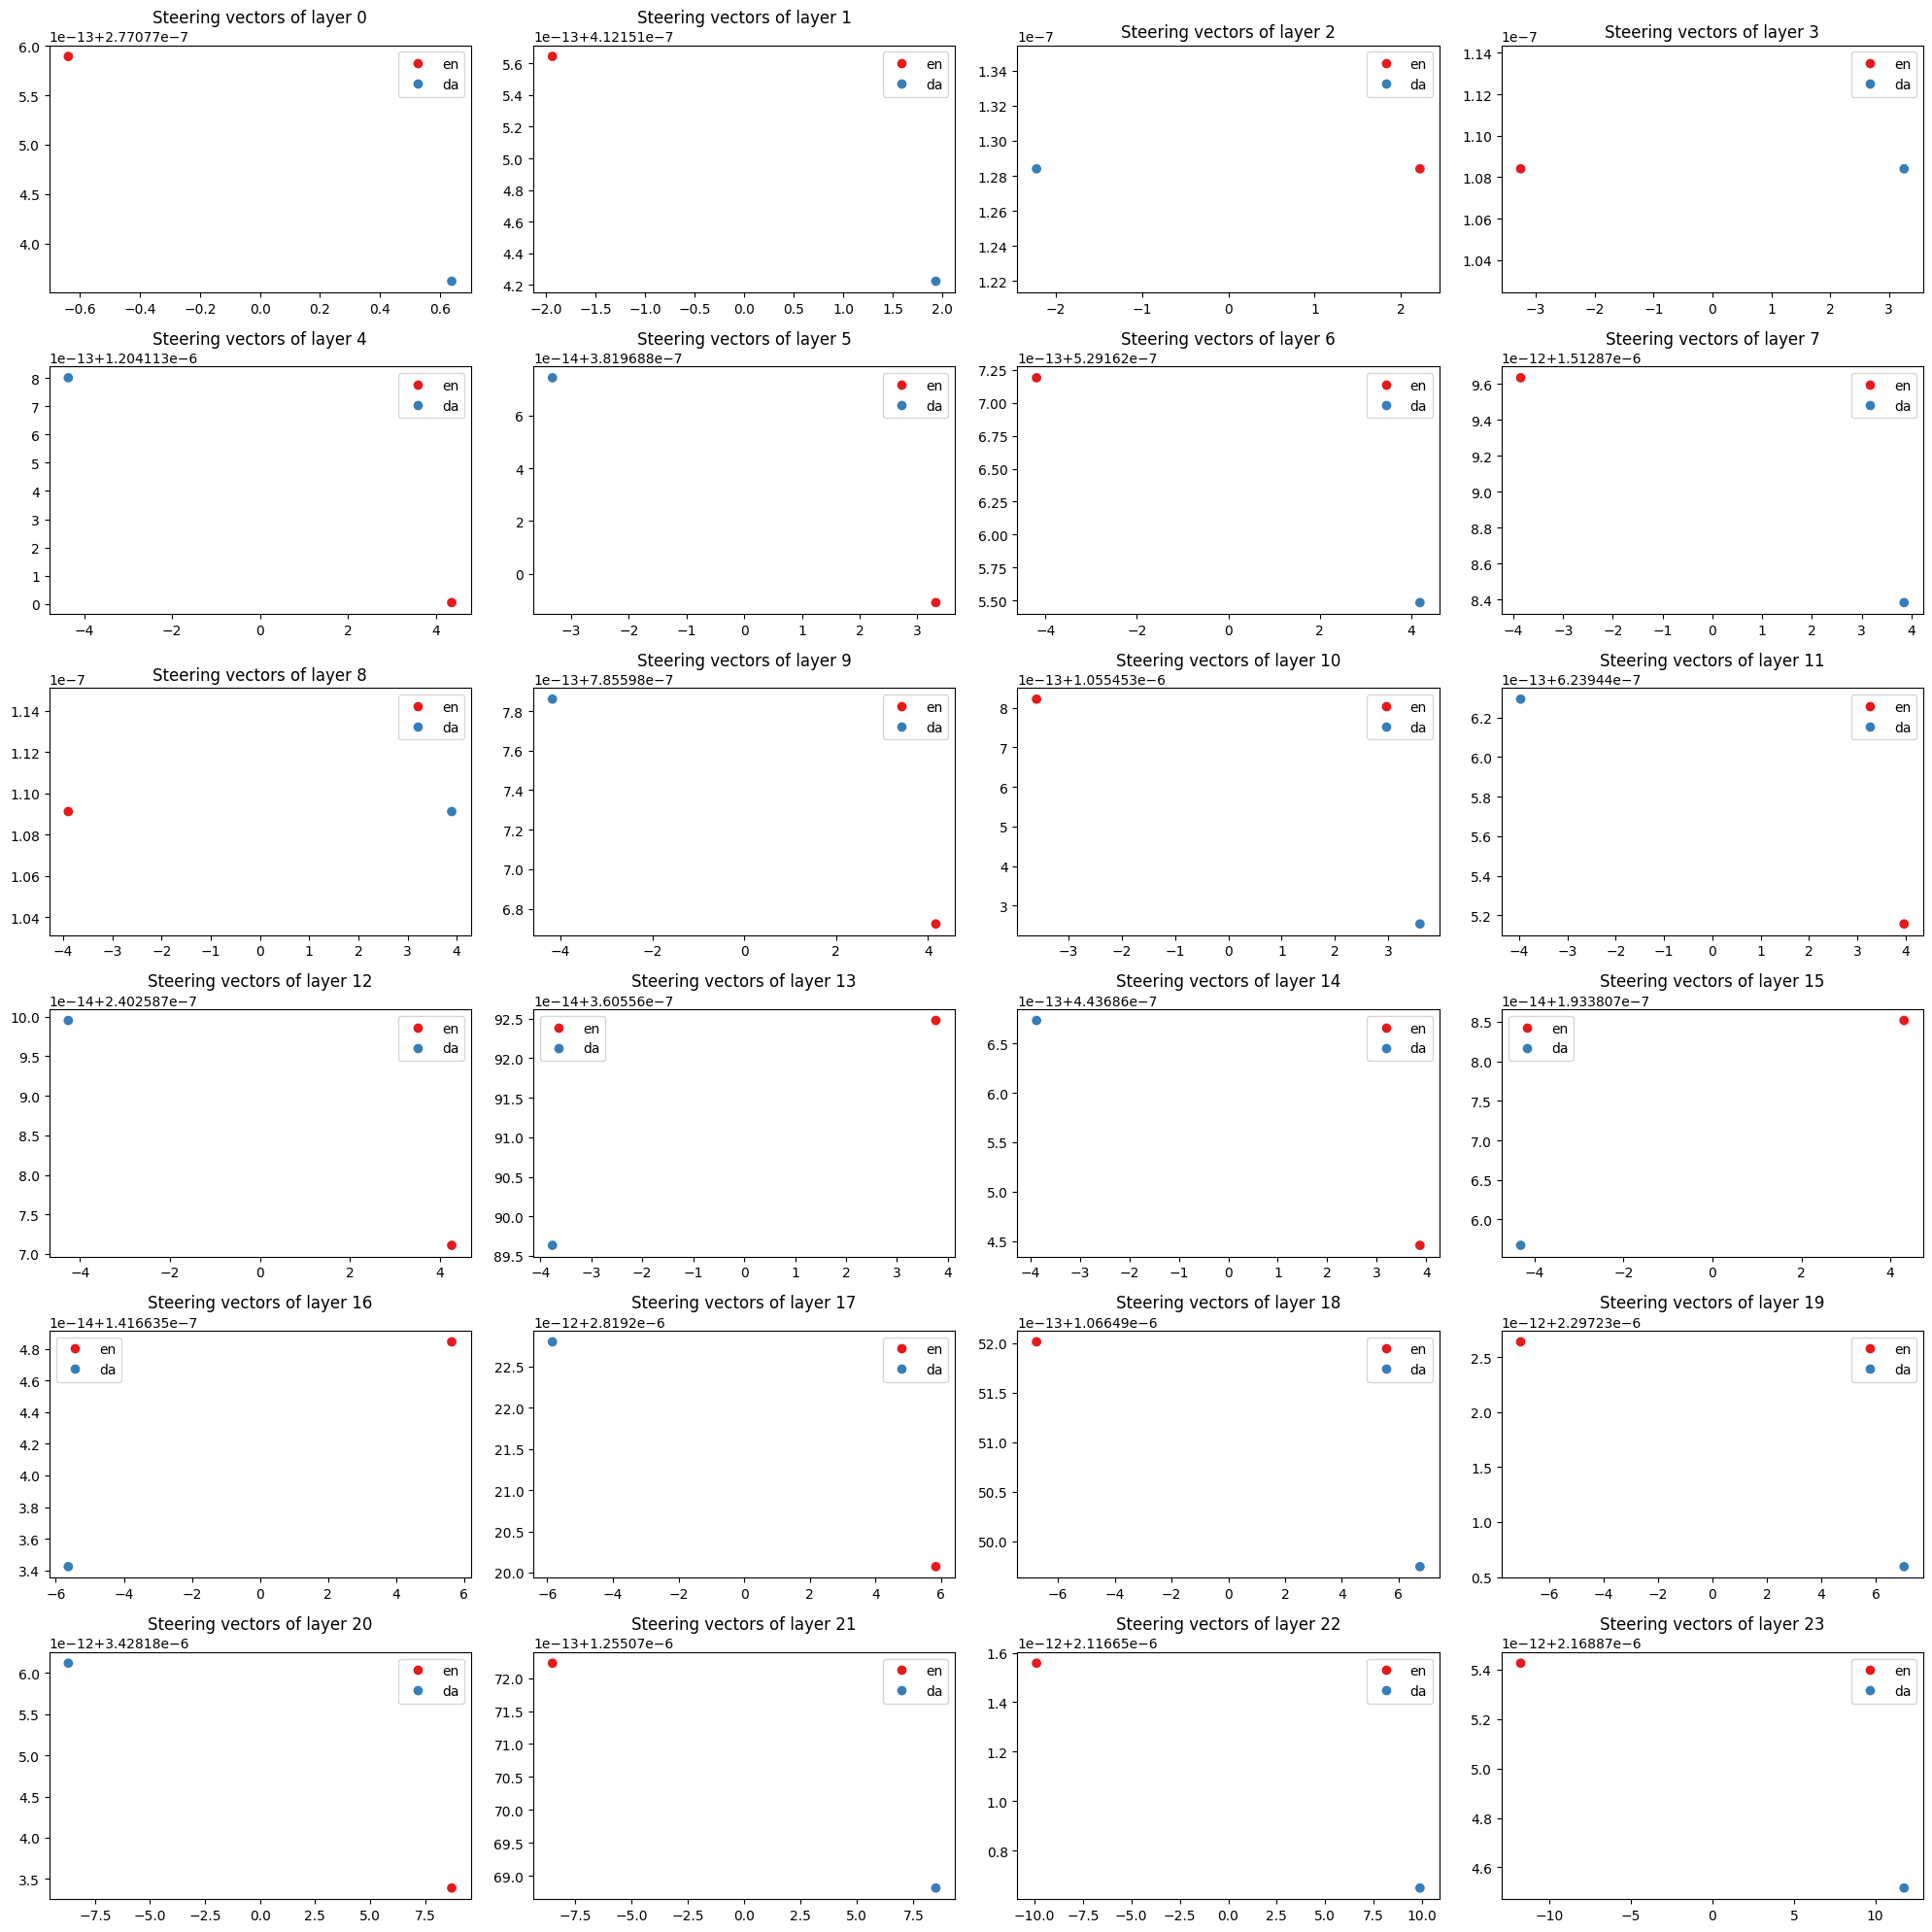

In [6]:
steering_vector_folder = Path('steering_vectors/')

visualising_steering_vectors.run(
    steering_vector_paths_by_language={
        'en': lambda layer: steering_vector_folder / f'EN/combined_steering_vector_layer_{layer}_tensor.pt',
        'da': lambda layer: steering_vector_folder / f'DA/combined_steering_vector_layer_{layer}_tensor.pt',
    },
    hidden_layers=24
)

## Bible study

In [ ]:
steering_vector_path = f"steering_vectors/{model_name_temp}/"
model_name = model_name
language1 = "da"
langauge2 = "en"
start_verse = 3
end_verse = 1000
lambda_search_space = [2,5,10,15]

create_bible_data.run(model_name,language1, steering_vector_path, lambda_search_space, start_verse,end_verse)


In [ ]:
path = "results/data/steering_data_bible/"
language_label = "__label__dan"
process_bible_data.run(path, language_label)

In [ ]:
visualize_bible_study.run(
    file_path='results/data/steering_data_bible/bible_data_combined.csv'
)